<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/ADP%EC%8B%A4%EC%8A%B5_2%EC%A3%BC%EC%B0%A8_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D(%ED%86%B5%EA%B3%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

○ 회귀분석 

회귀 모델을 한 마디로 정의하면 ‘어떤 자료에 대해서 그 값에 영향을 주는 조건을 고려하여 구한 평균’ 입니다. 통계학적인 관점에서 보면 모든 데이터는 아래와 같은 수식으로 표현할 수 있다고 가정

고전적 선형 회귀 모델은 독립 변수의 개수에 따라 아래와 같이 명칭을 구분하기도 합니다.

단순 선형 회귀 (simple linear regression): 독립 변수가 하나
다중 선형 회귀 (multiple linear regression): 독립 변수가 둘 이상
고전적 선형 회귀 모델은 형태가 단순한만큼 데이터에 대해 많은 가정을 갖고 있습니다.

● 오차항은 평균이 0이고 분산이 일정한 정규 분포를 갖는다.

● 독립변수와 종속변수는 선형 관계이다.

● 오차항은 자기 상관성이 없다.

● 데이터에 아웃라이어가 없다.

● 독립변수와 오차항은 서로 독립이다.

● 독립변수 간에서는 서로 선형적으로 독립이다.

따라서 만약 실제 데이터가 이런 가정을 충족하지 않는다면, 고전적 선형 회귀 모델은 실제 데이터를 정확히 반영하지 못하게 되므로 다른 방법을 사용해야 합니다. 일반적으로 알려진 가이드라인은 다음과 같습니다.

● 독립 변수와 종속 변수가 선형 관계가 아닌 경우: Polynomial regression, Generalized Additive Model (GAM)

● 오차항의 확률분포가 정규분포가 아닌 경우: Generalized Linear Model (GLM)

● 오차항에 자기 상관성이 있는 경우: Auto-regression

● 데이터에 아웃라이어가 있는 경우: Robust regression, Quantile regression

● 독립변수 간에 상관성이 있는 경우(다중공선성): Ridge regression, Lasso regression, Elastic Net regression, Principal Component Regression (PCR), Partial Least Square (PLS) regression

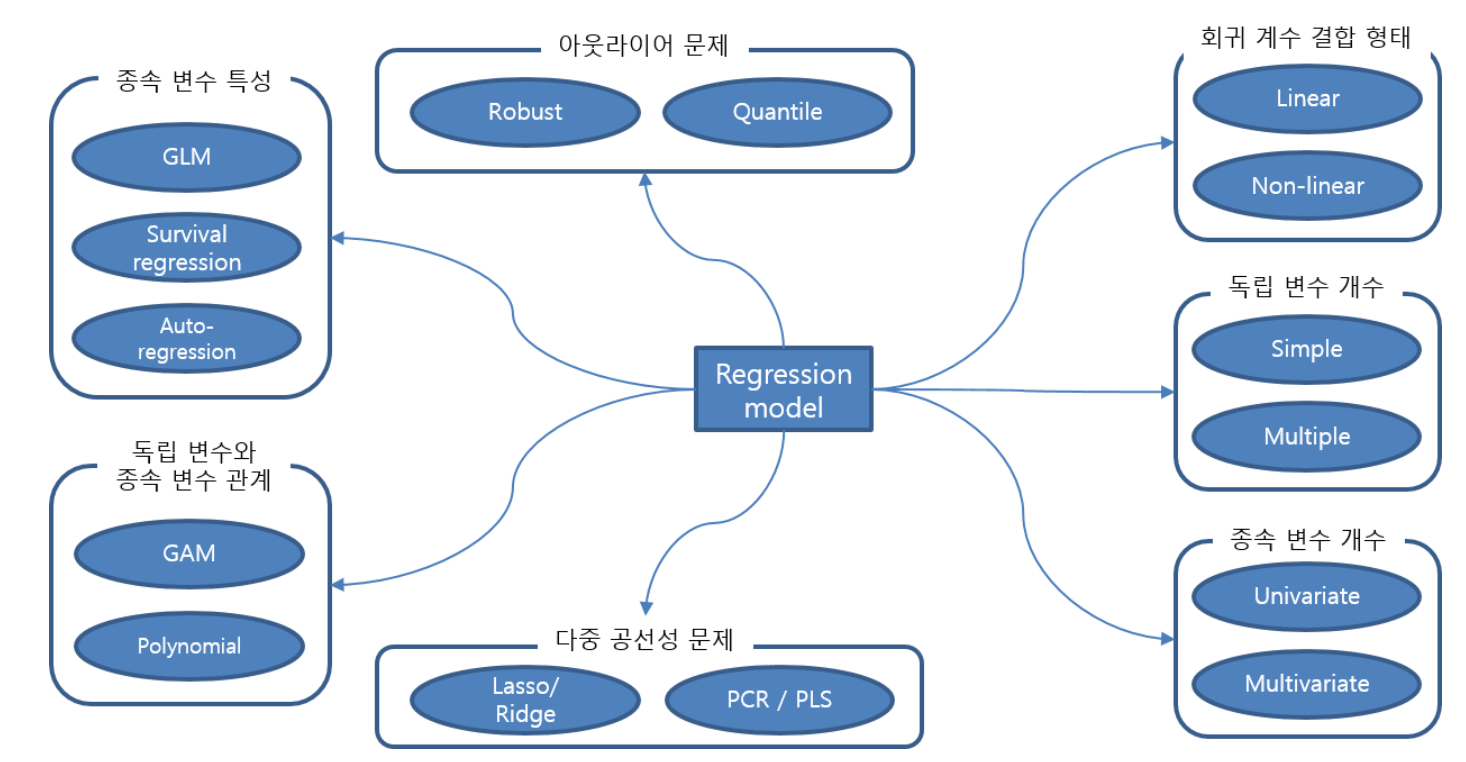

In [1]:
from google.colab import drive
drive.mount('/content/qdrive')

MessageError: ignored

In [ ]:
import pandas as pd
housing = pd.read_csv("/content/qdrive/MyDrive/housing.csv")

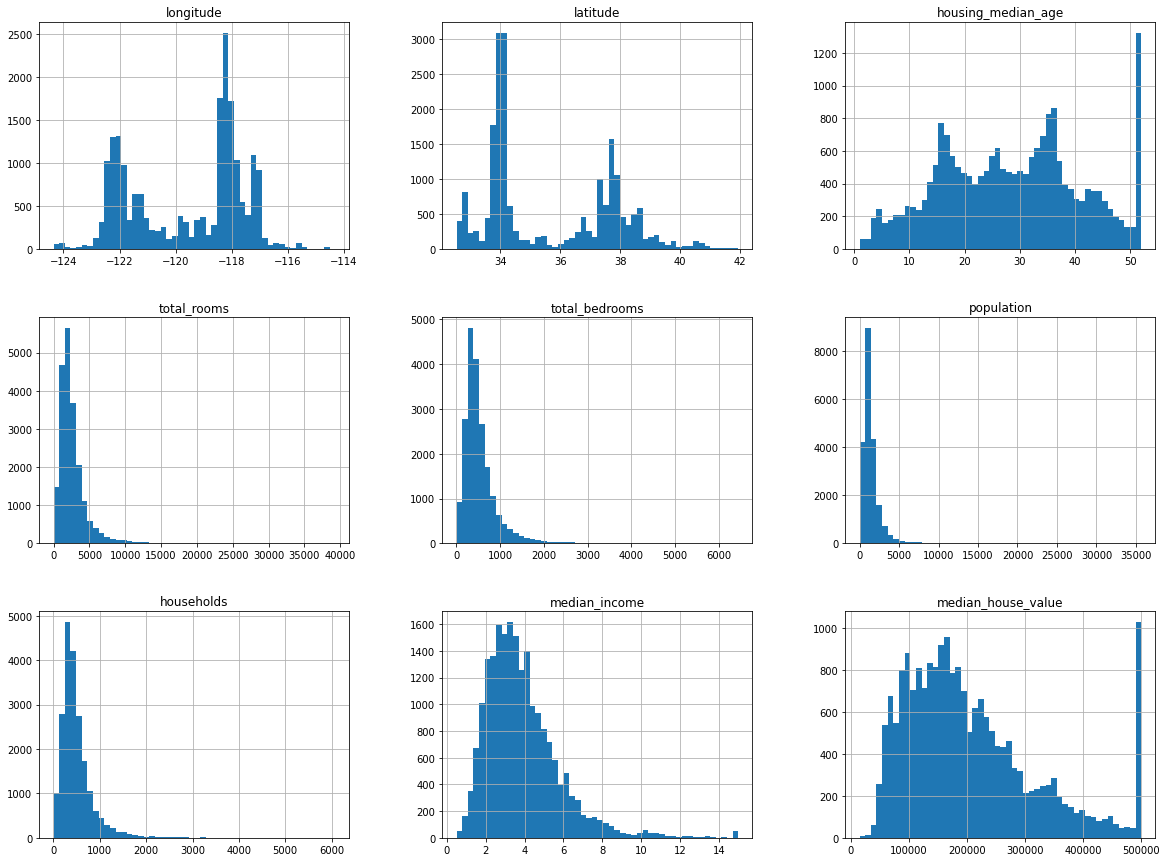

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.savefig(f'./histogram.jpg')
plt.show()


In [ ]:
import numpy as np

def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
len(train_set)
len(test_set)

4128

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

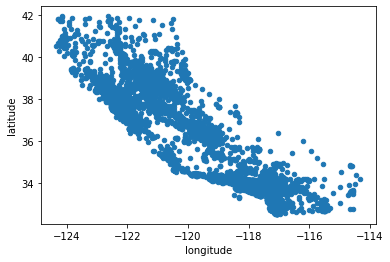

In [ ]:
train_set.plot(kind="scatter", x="longitude", y="latitude")

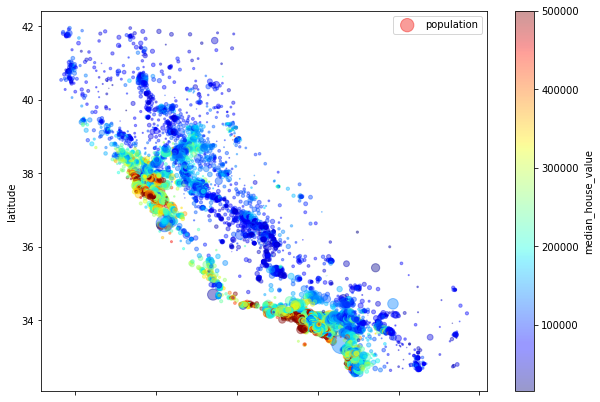

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

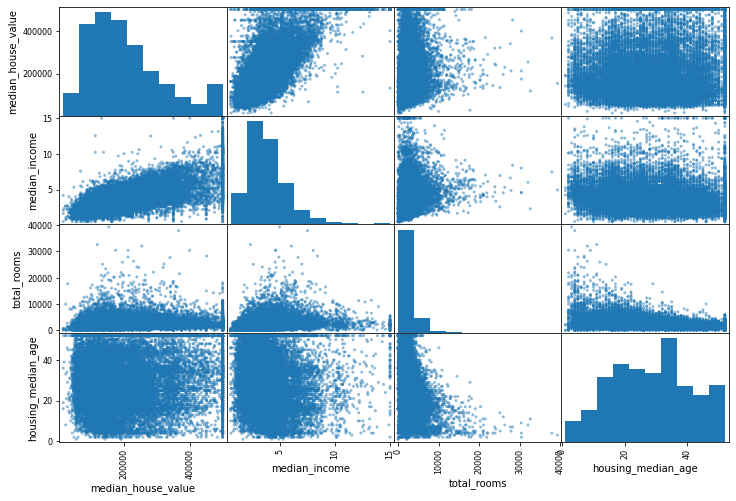

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.savefig(r"mat_img.png")

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [ ]:
housing = train_set.drop("median_house_value",axis = 1)
housing_label = train_set["median_house_value"].copy()

In [ ]:
#housing.dropna(subset=["total_bedrooms"]) #na행 제거
#housing.drop("total_bedrooms", axis=1) #na가 있는 변수 제거
median = housing["total_bedrooms"].median() #median 대체
housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)


In [ ]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)


In [ ]:
housing_cat = housing[["ocean_proximity"]]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68433.93736666226

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_label,
                         scoring = "neg_mean_squared_error", cv=10)
tree_rmse_score = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores", scores)
  print("Mean", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_score)

Scores [65770.16015174 69839.34085218 68281.95762463 71720.99014695
 69133.37713578 66987.24757666 64192.0382125  69858.50127337
 69176.9777425  67910.49461005]
Mean 68287.10853263526
Standard deviation: 2076.401073547878


In [ ]:
lin_scores = cross_val_score(lin_reg,housing_prepared, housing_label,
                             scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores [65581.45520649 71711.35784404 68143.02388491 66855.55244479
 69440.38017435 65640.36503235 65861.37192245 69898.33048393
 73117.94692191 69704.17693297]
Mean 68595.39608481781
Standard deviation: 2496.5245371674637


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_label, housing_predictions)

In [ ]:
np.sqrt(forest_rmse)

18112.512887189707

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [{'n_estimators':[3,10,30], 'max_features': [2,4,6,8]},
              {'bootstrap':[False], 'n_estimators': [3,10], 'max_features':[2,3,4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

63568.9573102329 {'max_features': 2, 'n_estimators': 3}
54534.08706653831 {'max_features': 2, 'n_estimators': 10}
52102.705523303994 {'max_features': 2, 'n_estimators': 30}
59289.06187985106 {'max_features': 4, 'n_estimators': 3}
52591.741106842 {'max_features': 4, 'n_estimators': 10}
50240.36605852522 {'max_features': 4, 'n_estimators': 30}
58429.161331085386 {'max_features': 6, 'n_estimators': 3}
52189.827795275036 {'max_features': 6, 'n_estimators': 10}
49776.31960555985 {'max_features': 6, 'n_estimators': 30}
58201.24722450692 {'max_features': 8, 'n_estimators': 3}
51634.863175803235 {'max_features': 8, 'n_estimators': 10}
49661.813422375584 {'max_features': 8, 'n_estimators': 30}
62024.83234238131 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54086.69005538257 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59480.34586817444 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52061.110618189516 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [ ]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("median_house_value",axis=1)
y_test = test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49712.9860399532